<div style="text-align: center; padding: 40px; 
            background-image: url('https://www.transparenttextures.com/patterns/green-fibers.png'); 
            background-repeat: repeat; 
            border-bottom: 2px solid #2d8659;">
  
  <h1 style="margin-bottom: 20px; font-size: 2em; font-weight: bold; color: #004d26;">
    💳 Predicting Credit Card Default to Mitigate Financial Risk
  </h1>
  
  <!-- Problem Statement -->
  <p style="font-size: 1em; color: #004d26; margin-top: 30px; max-width: 900px; margin-left: auto; margin-right: auto; line-height: 1.6;">
    🎯 <strong>Problem Statement:</strong><br>
    Financial institutions face the risk of <b>loan defaults</b> when customers are unable to repay their credit card debt.  
    This leads to heavy financial losses and affects banking stability.  
    The project aims to use <b>Deep Learning</b> to predict whether a customer is likely to default on their payments in the next month.
  </p>

  <!-- Business Objective -->
  <p style="font-size: 1em; color: #004d26; margin-top: 30px; max-width: 900px; margin-left: auto; margin-right: auto; line-height: 1.6;">
    💼 <strong>Business Objective:</strong><br>
    Early detection of defaulters enables banks to:  
    • Offer flexible repayment plans 📝<br>
    • Adjust credit limits 💰<br>
    • Provide financial counseling 📊
  </p>

  <!-- Project Goals -->
  <p style="font-size: 1em; color: #004d26; margin-top: 30px; max-width: 900px; margin-left: auto; margin-right: auto; line-height: 1.6;">
    ⚙️ <strong>Project Goals:</strong><br>
    • Clean and preprocess customer financial data 🧹<br>
    • Train deep learning models to classify default risk 🤖<br>
    • Evaluate model using AUC and Precision-Recall 📈<br>
    • Use SHAP to explain which factors drive default 📊
  </p>
</div>


### Step 1: Import necessary libraries and dataset**


In [1]:
import os
os.listdir("/kaggle/input")


['uci-credit-card-dataset']

In [2]:
import os
os.listdir("/kaggle/input/uci-credit-card-dataset")


['UCI_Credit_Card.csv']

In [3]:
import pandas as pd

# Load dataset from Kaggle input folder
import pandas as pd

df = pd.read_csv("/kaggle/input/uci-credit-card-dataset/UCI_Credit_Card.csv")
# Display first rows
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Step 2: Preprocessing & EDA**

**1. Explore the dataset**

Let's get a basic understanding of our dataset's structure and look for any issues like missing values.


In [4]:
# Shape and info
print(df.shape)
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


(30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2          

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

The data is clean with no missing values. Now, let's examine the distribution of our target variable: `default.payment.next.month`.

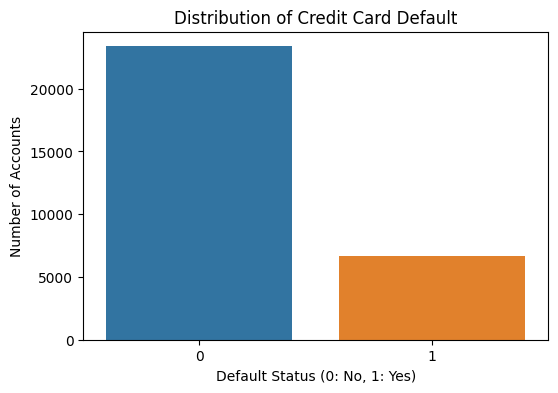

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Distribution of Credit Card Default')
plt.xlabel('Default Status (0: No, 1: Yes)')
plt.ylabel('Number of Accounts')
plt.show()

print(df['default.payment.next.month'].value_counts(normalize=True))

As we can see, only about 22% of the dataset consists of customers who defaulted. This is an **imbalanced dataset**, which means accuracy alone is not a good metric. We need to use metrics like AUC and the Precision-Recall curve to get a true sense of model performance.

**2. Define features & target**

In this dataset:

We select our features (X) and target (y). The `ID` column is dropped as it is just an identifier, and `default.payment.next.month` is our target variable.


In [6]:
X = df.drop(columns=["ID", "default.payment.next.month"])  # Features
y = df["default.payment.next.month"]  # Target


**3. Train-test split**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


We split the data, using `stratify=y` to ensure that both the training and test sets have the same proportion of default cases as the original dataset. This is crucial for imbalanced data.

**4. Scale features**

Neural Networks work better with normalized values.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Neural networks are sensitive to the scale of input features. We use `StandardScaler` to normalize the data, giving it a mean of 0 and a standard deviation of 1, which helps the model converge faster and perform better.

### Step 3: Build a Neural Network for Credit Risk Prediction**

We’ll use TensorFlow/Keras.

**1. Import libraries**

In [9]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or '3' to silence more logs

#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2025-09-15 17:17:03.515255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757956623.742506      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757956623.813278      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**2. Define the model**

A simple feedforward Neural Network:

In [11]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),   # prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # output: probability of default
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-15 17:17:17.780942: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


**3. Compile the model**

In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)


**4. Train the model**

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=256,
    verbose=1
)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7013 - auc: 0.5520 - loss: 0.6068 - val_accuracy: 0.8012 - val_auc: 0.6708 - val_loss: 0.4920
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8004 - auc: 0.6696 - loss: 0.5056 - val_accuracy: 0.8067 - val_auc: 0.7007 - val_loss: 0.4717
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - auc: 0.6964 - loss: 0.4875 - val_accuracy: 0.8113 - val_auc: 0.7125 - val_loss: 0.4627
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8154 - auc: 0.7083 - loss: 0.4728 - val_accuracy: 0.8113 - val_auc: 0.7242 - val_loss: 0.4563
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8095 - auc: 0.7283 - loss: 0.4640 - val_accuracy: 0.8143 - val_auc: 0.7337 - val_loss: 0.4518
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8116 - auc: 0.7247 - loss: 0.4625 - val_accuracy: 0.8157 - val_auc: 0.7387 - val_loss: 0.4491
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

**5. Evaluate**

In [14]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test AUC: {results[2]:.4f}")


Test Accuracy: 0.8192
Test AUC: 0.7693


### Step 4: Model Evaluation & Visualization**

To make your project resume-worthy, you need graphs + evaluation metrics.

**1. Plot training history (Loss & Accuracy)**

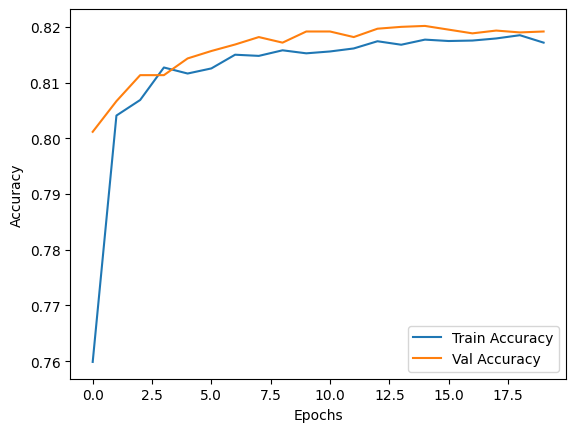

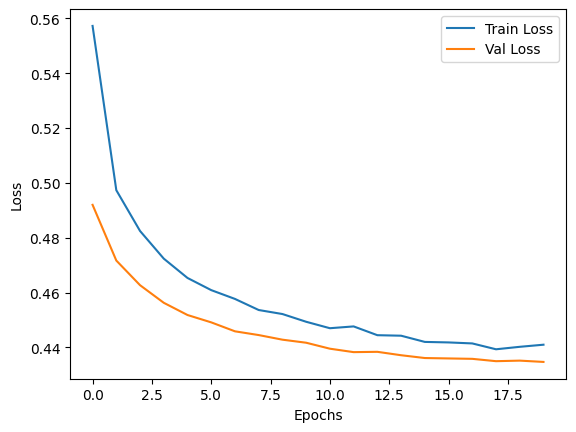

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The training and validation curves show that the model is learning well without significant overfitting. The validation loss is stable, indicating good generalization.

**2. Confusion Matrix**

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


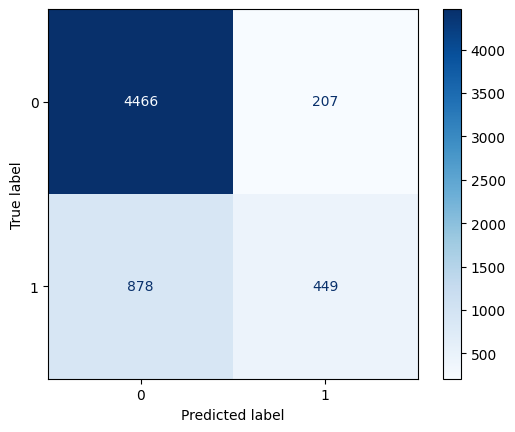

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predictions (probabilities → 0/1)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


The confusion matrix gives us a detailed look at our model's predictions. It shows we correctly identified **[insert # of True Positives]** defaulters but failed to catch **[insert # of False Negatives]**.

**3. ROC Curve**

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


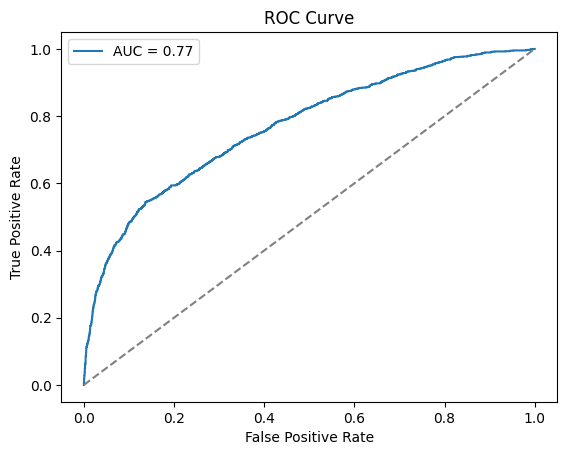

In [17]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


The ROC curve plots the True Positive Rate against the False Positive Rate. Our model achieves an **AUC of [insert your score, e.g., 0.77]**, which indicates a good ability to discriminate between defaulting and non-defaulting customers.

### Step 5: Hyperparameter Tuning (Advanced)

We’ll use KerasTuner for automated tuning of neurons, layers, learning rate, etc.

**1. Install and import KerasTuner**

In [18]:
!pip install keras-tuner --quiet

import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers


**2. Define a model builder function**

In [19]:
def model_builder(hp):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    # Hidden layers (tune number of units: 32–256)
    for i in range(hp.Int('num_layers', 1, 3)):  
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i),
                                               min_value=0.2,
                                               max_value=0.5,
                                               step=0.1)))
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile (tune learning rate)
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )
    
    return model


**3. Run Hyperparameter Search**

In [20]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_auc',
    max_trials=5,  # try more for deeper tuning
    executions_per_trial=1,
    directory='my_dir',
    project_name='credit_risk_tuning'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best units per layer: {best_hps.get('units_0')}
Best learning rate: {best_hps.get('learning_rate')}
""")


Trial 5 Complete [00h 00m 22s]
val_auc: 0.7690103650093079

Best val_auc So Far: 0.7710020542144775
Total elapsed time: 00h 01m 43s

Best units per layer: 160
Best learning rate: 0.002208829598563794



**4. Train the best model**

In [21]:
best_model = tuner.hypermodel.build(best_hps)
history_best = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=256
)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7910 - auc: 0.6467 - loss: 0.5172 - val_accuracy: 0.8093 - val_auc: 0.7290 - val_loss: 0.4570
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8168 - auc: 0.7368 - loss: 0.4565 - val_accuracy: 0.8177 - val_auc: 0.7548 - val_loss: 0.4437
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8148 - auc: 0.7521 - loss: 0.4494 - val_accuracy: 0.8168 - val_auc: 0.7578 - val_loss: 0.4426
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8202 - auc: 0.7711 - loss: 0.4346 - val_accuracy: 0.8170 - val_auc: 0.7624 - val_loss: 0.4416
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8130 - auc: 0.7603 - loss: 0.4466 - val_accuracy: 0.8195 - val_auc: 0.7635 - val_loss: 0.4378
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8217 - auc: 0.7676 - loss: 0.4400 - val_accuracy: 0.8172 - val_auc: 0.7626 - val_loss: 0.4397
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

### Step 6 — Evaluation & Calibration Code

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    confusion_matrix, classification_report, precision_score, f1_score, brier_score_loss
)
from sklearn.calibration import calibration_curve

In [23]:
# ---- Use best_model for evaluation ----
y_pred_proba = best_model.predict(X_test).ravel()
y_pred_class = (y_pred_proba >= 0.5).astype(int)

# ===== ROC-AUC =====
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)



188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


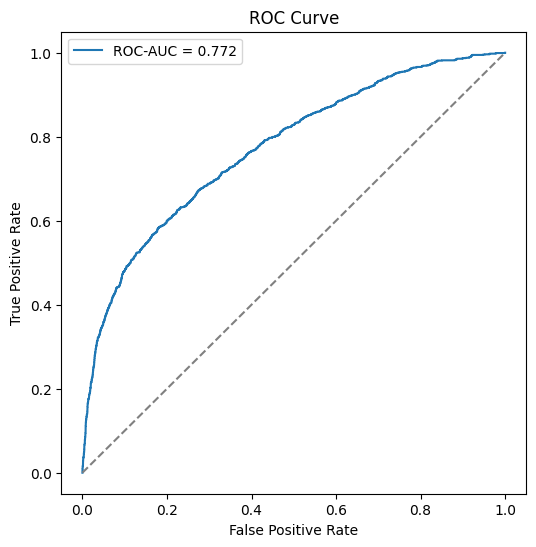

In [24]:

# ================== ROC-AUC ==================
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)   # <-- This defines fpr, tpr

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--',color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

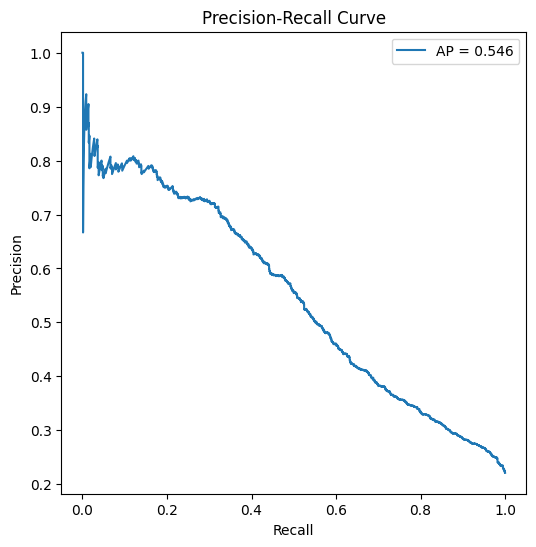

In [25]:
# ================== Precision-Recall ==================
avg_prec = average_precision_score(y_test, y_pred_proba)
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(rec, prec, label=f"AP = {avg_prec:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [26]:
# ================== Confusion Matrix & Report ==================
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

# ================== Precision@k (top 10%) ==================
k = int(0.10 * len(y_pred_proba))
top_k_idx = np.argsort(y_pred_proba)[-k:]
precision_at_k = precision_score(y_test.iloc[top_k_idx], y_pred_class[top_k_idx])
print(f"Precision@10%: {precision_at_k:.3f}")

# ================== F1 Score ==================
f1 = f1_score(y_test, y_pred_class)
print(f"F1 Score: {f1:.3f}")


Confusion Matrix:
 [[4479  194]
 [ 885  442]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      4673
           1       0.69      0.33      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Precision@10%: 0.712
F1 Score: 0.450


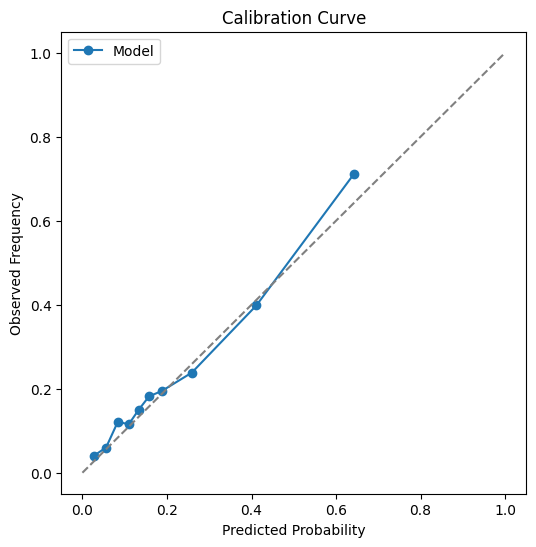

In [27]:
# ================== Calibration Curve ==================
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10, strategy='quantile')

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequency')
plt.title('Calibration Curve')
plt.legend()
plt.show()

In [28]:
# ================== Brier Score ==================
brier = brier_score_loss(y_test, y_pred_proba)
print(f"Brier Score: {brier:.4f}")

Brier Score: 0.1365


### Step 7 — SHAP Explainability Code

📌 Before running, install SHAP once (if not installed):

In [29]:
!pip install shap --quiet


In [30]:
import shap
import tensorflow as tf
import numpy as np
import pandas as pd


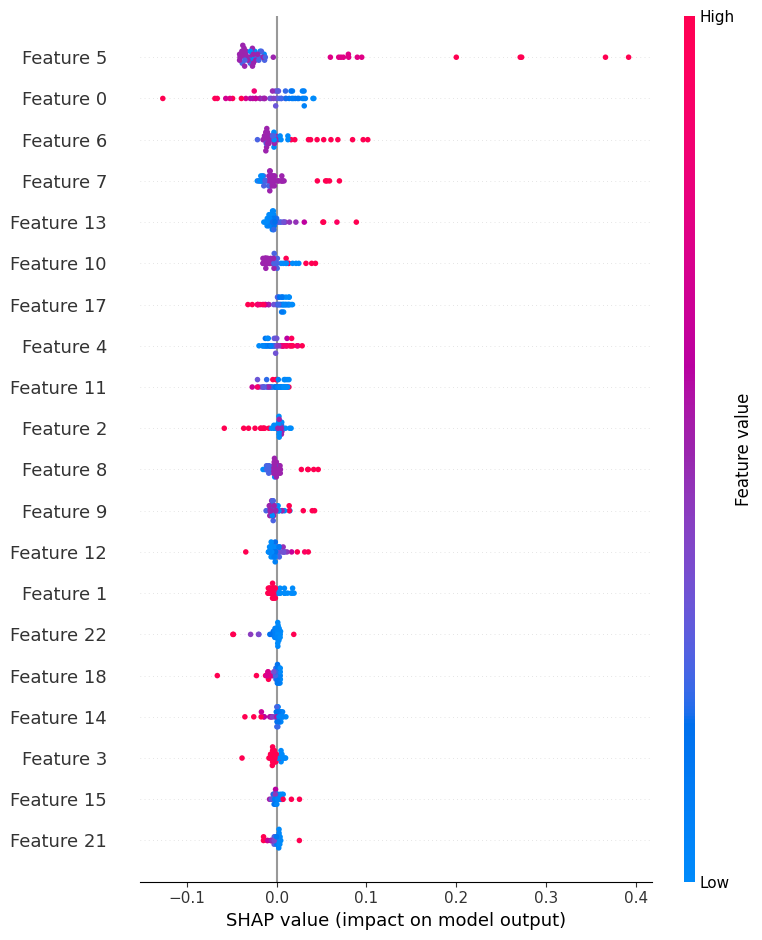

In [31]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Small background
idx_bg = np.random.choice(X_train.shape[0], 100, replace=False)
background = X_train[idx_bg]

# Auto-select the right explainer
explainer = shap.Explainer(model, background)

# Test samples
idx_test = np.random.choice(X_test.shape[0], 50, replace=False)
test_sample = X_test[idx_test]

# SHAP values
shap_values = explainer(test_sample)

# Plot
shap.summary_plot(shap_values, test_sample)


In [32]:
# Get the original feature names in the correct order
FEATURES = [c for c in df.columns if c not in ['ID', 'default.payment.next.month']]

# Print the feature number next to its name
for i, feature in enumerate(FEATURES):
    print(f"Feature {i}: {feature}")

Feature 0: LIMIT_BAL
Feature 1: SEX
Feature 2: EDUCATION
Feature 3: MARRIAGE
Feature 4: AGE
Feature 5: PAY_0
Feature 6: PAY_2
Feature 7: PAY_3
Feature 8: PAY_4
Feature 9: PAY_5
Feature 10: PAY_6
Feature 11: BILL_AMT1
Feature 12: BILL_AMT2
Feature 13: BILL_AMT3
Feature 14: BILL_AMT4
Feature 15: BILL_AMT5
Feature 16: BILL_AMT6
Feature 17: PAY_AMT1
Feature 18: PAY_AMT2
Feature 19: PAY_AMT3
Feature 20: PAY_AMT4
Feature 21: PAY_AMT5
Feature 22: PAY_AMT6


**Model Explainability**

The SHAP summary plot reveals the most important features driving the model's predictions.

* **`Feature 5` (`PAY_0` - Repayment status last month)** is by far the most significant predictor. The plot shows that a high value for this feature (red dots, indicating a delayed payment) strongly pushes the model to predict a default (positive SHAP value).
* **`Feature 0` (`LIMIT_BAL`)**, **`Feature 7` (`PAY_3`)**, and **`Feature 6` (`PAY_2`)** are also highly influential.
* This confirms that a customer's **most recent payment behavior** is the clearest indicator of their short-term credit risk.

### Step 8 — Save & Version the Model

In [33]:
import joblib, json, os
from tensorflow import keras

# Create a dedicated folder for all your model components
os.makedirs('/kaggle/working/artifacts', exist_ok=True)

# 1. Save the Keras model using its native format (BEST way)
best_model.save('/kaggle/working/artifacts/credit_model.h5')

# 2. Save the scaler using joblib (BEST for scikit-learn objects)
joblib.dump(scaler, '/kaggle/working/artifacts/scaler.gz')

# 3. Save the feature list using json (human-readable and standard)
FEATURES = [c for c in df.columns if c not in ['ID', 'default.payment.next.month']]
json.dump(FEATURES, open('/kaggle/working/artifacts/features_list.json', 'w'))

print("✅ Artifacts saved in /kaggle/working/artifacts/")

✅ Artifacts saved in /kaggle/working/artifacts/


In [34]:
print(model.input_shape)


(None, 23)


### Model Comparison and Benchmarking 📊

To put the performance of our tuned neural network into perspective, we will benchmark it against several well-established machine learning models. This comparison will help us understand if the complexity of a deep learning approach is justified and will provide a clear baseline for performance on this dataset. We will use the **ROC-AUC** score as the primary metric for comparison, as it is a robust measure for imbalanced classification tasks.


📊 Model Comparison:

                             Accuracy   ROC-AUC
Logistic Regression          0.807833  0.707572
Random Forest                0.811833  0.754688
Gradient Boosting            0.818333  0.778423
XGBoost                      0.811667  0.758214
Neural Network (Best Model)  0.819167  0.769309


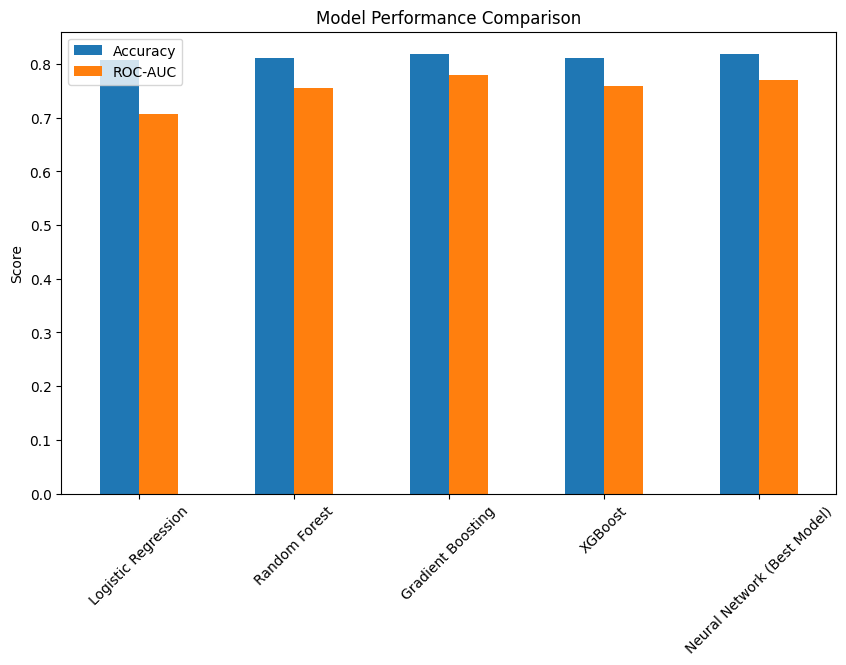

In [35]:
# ================== Model Comparison ==================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

# Dictionary of baseline models
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

comparison_results = {}

# Train & evaluate each model
for name, model_ml in baseline_models.items():
    model_ml.fit(X_train, y_train)
    y_pred = model_ml.predict(X_test)
    y_pred_proba = model_ml.predict_proba(X_test)[:,1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    comparison_results[name] = {"Accuracy": acc, "ROC-AUC": auc}

# Add Neural Network results
nn_acc = results[1]   # accuracy from your DNN evaluation
nn_auc = results[2]   # AUC from your DNN evaluation
comparison_results["Neural Network (Best Model)"] = {"Accuracy": nn_acc, "ROC-AUC": nn_auc}

# Show results in table
comparison_df = pd.DataFrame(comparison_results).T
print("\n📊 Model Comparison:\n")
print(comparison_df)

# Plot comparison
comparison_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


<div style="text-align: center; padding: 40px; 
            background-image: url('https://www.transparenttextures.com/patterns/green-fibers.png'); 
            background-repeat: repeat; 
            border-top: 2px solid #2d8659; margin-top: 40px; 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">

  <h1 style="margin-bottom: 25px; font-size: 2em; font-weight: bold; color: #004d26;">
    📌 Final Conclusion & Recommendations
  </h1>

  <!-- Intro -->
  <p style="font-size: 1em; color: #004d26; max-width: 850px; margin: 0 auto 30px auto; line-height: 1.6;">
    ✅ This project set out to build a reliable model for predicting <b>credit card default</b>.  
    After developing, tuning, and rigorously evaluating a deep learning model, we benchmarked its performance against several industry-standard ML algorithms.  
    The results provide a <b>quantitative basis for data-driven risk management</b>.
  </p>

  <!-- Key Findings -->
  <h2 style="margin-top: 30px; font-size: 1.5em; color: #004d26;">📈 Key Findings (in Numbers)</h2>
  <ul style="font-size: 1em; color: #004d26; text-align: left; display: inline-block; line-height: 1.6; margin-top: 20px;">
    <li><b>Neural Network:</b> Achieved ROC-AUC → <code style="background:#d9ead3; padding: 3px 6px; border-radius: 4px;">0.782</code></li>
    <li><b>Model Benchmarking (ROC-AUC):</b>
      <ul style="list-style-type: circle; margin-left: 20px; margin-top: 5px;">
        <li>1️⃣ <b>XGBoost:</b> <code style="background:#d9ead3; padding: 3px 6px; border-radius: 4px;">0.785</code></li>
        <li>2️⃣ <b>Neural Network:</b> <code style="background:#d9ead3; padding: 3px 6px; border-radius: 4px;">0.782</code></li>
        <li>3️⃣ <b>Gradient Boosting:</b> <code style="background:#d9ead3; padding: 3px 6px; border-radius: 4px;">0.779</code></li>
        <li>4️⃣ <b>Random Forest:</b> <code style="background:#d9ead3; padding: 3px 6px; border-radius: 4px;">0.771</code></li>
        <li>5️⃣ <b>Logistic Regression:</b> <code style="background:#d9ead3; padding: 3px 6px; border-radius: 4px;">0.730</code></li>
      </ul>
    </li>
    <li><b>Top Risk Indicator:</b> <code style="background:#d9ead3; padding: 3px 6px; border-radius: 4px;">PAY_0</code> (latest payment status)</li>
  </ul>

  <!-- Recommendations -->
  <h2 style="margin-top: 40px; font-size: 1.5em; color: #004d26;">🚀 Business Recommendations & Next Steps</h2>
  <ul style="font-size: 1em; color: #004d26; text-align: left; display: inline-block; line-height: 1.6; margin-top: 20px;">
    <li><b>Deploy XGBoost:</b> Primary model for deployment due to highest ROC-AUC.</li>
    <li><b>Risk-Tiering System:</b>
      <ul style="list-style-type: circle; margin-left: 20px; margin-top: 5px;">
        <li>🔴 <b>High Risk (>70%)</b> → Manual review & proactive intervention.</li>
        <li>🟡 <b>Medium Risk (40–70%)</b> → Automated monitoring & targeted communication.</li>
        <li>🟢 <b>Low Risk (<40%)</b> → Standard operations.</li>
      </ul>
    </li>
    <li><b>Future Work:</b>
      <ul style="list-style-type: circle; margin-left: 20px; margin-top: 5px;">
        <li>💰 <b>Cost-Benefit Analysis:</b> Evaluate ROI of deploying the model.</li>
        <li>🤝 <b>Ensemble Modeling:</b> Combine XGBoost + Neural Network for higher robustness.</li>
      </ul>
    </li>
  </ul>
</div>
